In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

# Q1 Perceptron

In [3]:
def generateDataset(separability,plotData = True):

    m = np.random.uniform(-10, 10, 1)
    c0= np.random.uniform(-5, 5, 1)
    # c0=0
    c1= c0+separability
    c2 = c0-separability

    x = np.linspace(-1, 1, 2)
    y = m * x + c0
    y1 = m * x + c1
    y2 = m * x + c2



    data = []
    class1 = class2 =0
    while len(data)!=1000:
        xtemp = np.random.uniform(-4,4)
        ytemp = np.random.uniform(-4,4)
        if ytemp-(m*xtemp)>c1:
            if class1<500:
                data.append([xtemp,ytemp,-1])
            class1+=1
        if ytemp-(m*xtemp)<c2:
            if class2<=500:
                data.append([xtemp,ytemp,1])
            class2+=1


    data = np.array(data)

    X_train  =  data[:,:2]
    y_train = data[:,2]

    if plotData:

        plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train)

        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Dataset')
        plt.show()

    return X_train,y_train

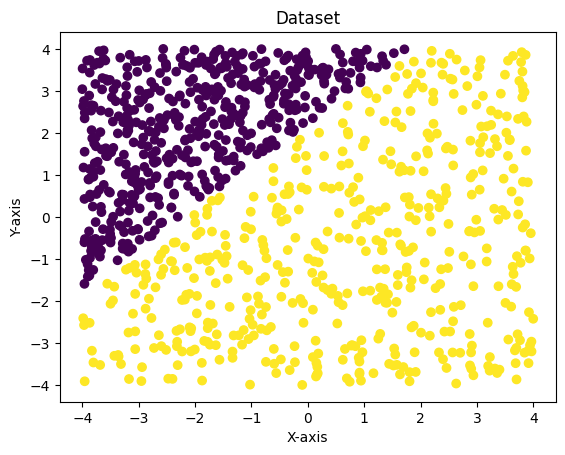

In [4]:
X_train,y_train = generateDataset(0.1,True)

In [5]:
np.unique(y_train,return_counts=True)


(array([-1.,  1.]), array([499, 501]))

In [6]:
class Perceptron:
    def __init__(self,X,y,lr=0.1) -> None:
        self.X = X
        ones_column = np.ones((1,self.X.shape[0]), dtype=self.X.dtype)
        self.X = np.insert(self.X, 0, ones_column, axis=1)
        

        self.y = y
        self.lr=lr
        self.W = np.random.rand(len(self.X[0]))

        # print(self.W)
    
    def forward(self,x):
    
        intermediate = np.dot(x,np.transpose(self.W))
        y = self.signum(inter=intermediate)
        return y
    


    def train(self,epochs):
        required_epochs = 0
        for i in range(epochs):
            missClassi = 0
            for j in range(self.X.shape[0]):
                x = self.X[j]
                y = self.y[j]
                yHat = self.forward(x)
                
                # If y*yHat is -1 then it's a miss classification
                if y*yHat<0:
                    # Weight Update rule
                    self.W+= self.lr*x*y
                    missClassi+=1
            if missClassi ==0:
                required_epochs = i
                break
            
        return [self.W,required_epochs]
            

    def signum(self,inter):
        if inter>=0:
            return 1
        else:
            return -1

In [7]:

p1 = Perceptron(X=X_train,y=y_train,lr=1e-3)

In [8]:
Wmat,req_epochs = p1.train(epochs=500)

In [9]:
Wmat = -Wmat.astype(np.float64)/Wmat.astype(np.float64)[2]

In [10]:
Wmat

array([ 2.16233593,  1.03640776, -1.        ])

In [11]:
req_epochs

3

In [12]:
ymin = min(X_train[:,1])
ymax = max(X_train[:,1])
xmin = (ymin-Wmat[0])/Wmat[1]
xmax = (ymax-Wmat[0])/Wmat[1]

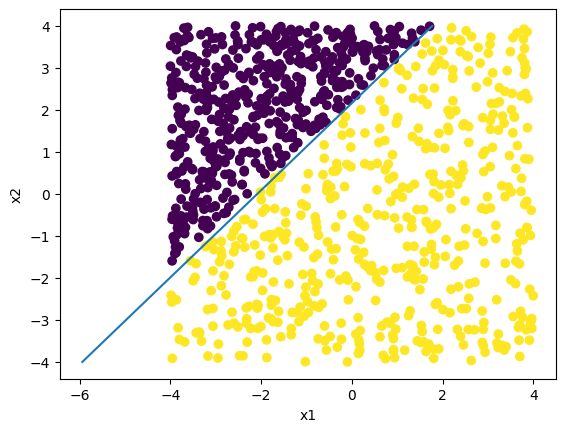

In [13]:
x = np.linspace(xmin, xmax, 2)
y = (Wmat[1] * x + Wmat[0])

plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train)
plt.ylabel('x2')
plt.xlabel('x1')
plt.plot(x, y, label='Line: y = 2x + 3',linestyle='-')



In [14]:
separabilities = [0.01,0.1,0.5]
for i in range(len(separabilities)):
    X_train,y_train = generateDataset(separabilities[i],False)
    
    total_itrs = 0
    for j in range(5):
        p1 = Perceptron(X=X_train,y=y_train,lr=0.1)
        Wmat,req_epochs = p1.train(epochs=100)
        Wmat = -Wmat.astype(np.float64)/Wmat.astype(np.float64)[2]
        # print(req_epochs)
        total_itrs+= req_epochs
        # print(Wmat)
    avg_epochs = total_itrs/5
    print(f'Average epochs required for gamma {separabilities[i]} = {avg_epochs}')

Average epochs required for gamma 0.01 = 15.0
Average epochs required for gamma 0.1 = 18.8
Average epochs required for gamma 0.5 = 1.2


# Q2

Using Binary Cross Entropy as the loss function

In [15]:
# Converting (-1,1) labels to (0,1)
y_train_new = np.ones_like(y_train)
for i in range(len(y_train)):
    if y_train[i]==-1:
        y_train_new[i] = 0
y_train_new[:10]

array([1., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

Explaination

<!-- ![image info](IMG_0363.jpeg) -->
<img src="IMG_0365.jpeg" alt="drawing" width="500"/>


In [16]:
class LinearClassifier:
    def __init__(self,X,y,lr=0.1) -> None:
        self.X = X
        # Adding column of 1's to X to encorporate bias in the weight matrix
        one_column = np.ones((1,self.X.shape[0]), dtype=self.X.dtype)
        self.X = np.insert(self.X, 0, one_column, axis=1)
        self.lenData = self.X.shape[0]

        self.y = y
        self.lr=lr
        self.W = np.random.rand(len(self.X[0]))
        print(self.W.shape)

    def train(self,epochs):
        self.loss = []
        for i in range(epochs):
            yHat = self.forward()         
            # Taking average loss, hence dividing by self.lenData   
            dW = np.dot(np.transpose((yHat-self.y)),self.X)/self.lenData
            self.W = self.W - self.lr * dW
            loss = self.loss_function(yHat=yHat)

            self.loss.append(loss)

            if i%100 ==0:
                print(f"Loss is: {loss}")
            if loss<0.5*1e-1:
                self.epochs = i
                print(f"Stopping after {i} epochs")
                break
        return self.W
    
    def forward(self):
    
        h = np.dot(self.X,self.W)
        yHat = self.sigmoid(h)
        return yHat
    
    def loss_function(self,yHat):
        loss = 0
        for i in range(self.lenData):
            loss += -(self.y[i])*np.log(yHat[i])-(1-self.y[i])*np.log(1-yHat[i])
        return loss/self.lenData
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def plotLoss(self):
        X = np.linspace(0, self.epochs, num=self.epochs+1, endpoint=True, retstep=False, dtype=None, axis=0)

        plt.ylim((0,1))
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title("Loss Plot")
        plt.plot(X,self.loss)

In [17]:
LC = LinearClassifier(X_train,y_train_new)

(3,)


In [18]:
Weights = LC.train(2000)

Loss is: 0.8236513405695559
Loss is: 0.1033657924838512
Loss is: 0.07672561455778863
Loss is: 0.06442073163065266
Loss is: 0.05683537343556944
Loss is: 0.05151234476890963
Stopping after 535 epochs


In [19]:
Weights

array([-0.32850568,  3.10743598, -0.60676458])

In [20]:
WeightsNorm = -Weights/Weights[2]
WeightsNorm

array([-0.5414055 ,  5.12132069, -1.        ])

In [21]:
ymin = min(X_train[:,1])
ymax = max(X_train[:,1])
xmin = (ymin-Wmat[0])/Wmat[1]
xmax = (ymax-Wmat[0])/Wmat[1]

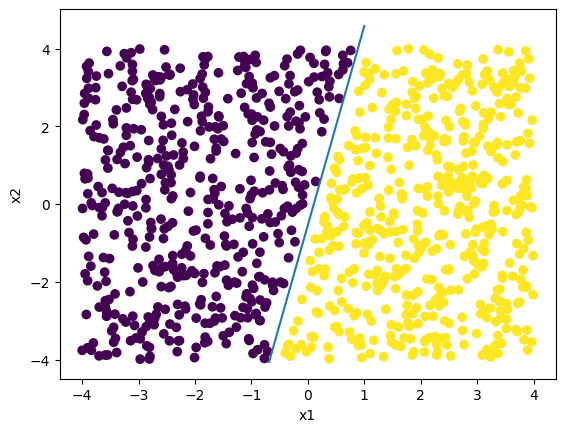

In [22]:
x = np.linspace(xmin, xmax, 2)
y = WeightsNorm[1] * x + WeightsNorm[0] 

plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x, y, label='Line: y = 2x + 3',linestyle='-')

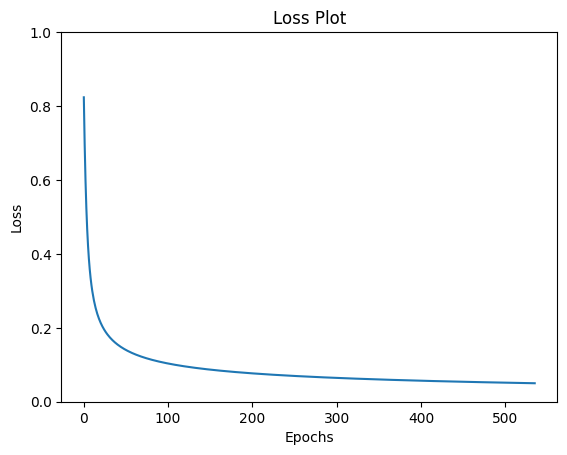

In [23]:
LC.plotLoss()

# Q3

## Dataset Creation

In [24]:
def generateCircles(xc,yc,separability):


    

    r1= np.random.randint(low=5,high=15)
    r2 = r1+separability
    r3 = r1+3*separability
    print(r1)


    data = []

    c1 = 0
    c2 = 0

    while len(data)!=1000:
        xtemp = np.random.randint(-100,100)
        ytemp = np.random.randint(-100,100)
        
        rtemp  = (xtemp-xc)**2+ (ytemp-yc)**2
        
        if rtemp <=r1**2:
            if c1<500:
                data.append([xtemp,ytemp,1])
            c1+=1
        # if (xtemp**2)+(ytemp**2)>=r1 and xtemp**2+y**2<r1:
        
        if rtemp in range(r2**2,r3**2):
        # if xtemp**2+ytemp**2>=r2:
            if c2<=500:
                data.append([xtemp,ytemp,0])
            c2+=1
            


    data = np.array(data)

    X_train  =  data[:,:2]
    y_train = data[:,2]

    plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train)

    plt.Circle(0, r1, edgecolor='b', facecolor='none')
    plt.Circle(0, r2, edgecolor='b', facecolor='none')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

    return X_train,y_train

12


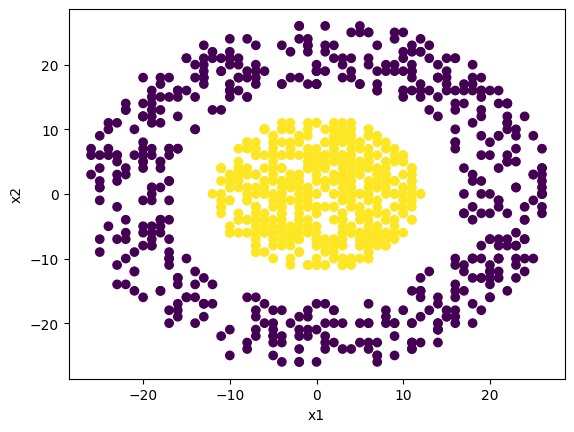

In [25]:
X_train_circ,y_train_circ = generateCircles(0,0,5)

In [26]:
X_train_circ = np.array(X_train_circ,dtype=np.float64)
y_train_circ = np.array(y_train_circ)

In [27]:
np.unique(y_train_circ,return_counts=True)

(array([0, 1]), array([501, 499]))

## MLP

Explaination

<!-- ![image info](IMG_0363.jpeg) -->
<img src="IMG_0364.jpeg" alt="drawing" width="500"/>


As I am using full batch gradient descent, the shape of the update for biases is (nxhi) for bih and (nx1) for boh, but shape of bih is (1xhi) and boh is (1x1). Hence I am taking the average of loss while updating biases. This issue doesnt affect the weight matrix as it already gets handleld by matrix multiplication. Hence we only have to divide by number of samples in the batch while updating the weight matrix.

In [28]:
class NonLinearClassifier3:
    def __init__(self,X,y,lr=0.0001,hiddenLayerSize = 3) -> None:
        self.X = X
        self.lenData = self.X.shape[0]

        self.y = np.reshape(y,(len(y),1))

        self.lr=lr
        self.hiddenLayerSize = hiddenLayerSize

        self.Wih = np.random.rand(len(self.X[0]),self.hiddenLayerSize)
        self.Woh = np.random.rand(self.hiddenLayerSize,1)


        self.bih = np.ones((1,self.hiddenLayerSize))
        self.boh = np.ones((1,1))
        
        self.loss = []

    def train(self,epochs):
        self.epochs = epochs
        self.loss = []
        for i in range(epochs):
            yHat = self.forward(self.X)            

            self.backprop(yHat=yHat)
            loss = self.loss_function(yHat)
            
            if(i%100==0):
                print(f'Epoch {i} --->Loss is: {loss}')
            
            self.loss.append(loss)
            
            # Early Stopping
            if loss<0.5*(1e-1):
                self.epochs = i
                print(f'**Stopping Training at: {i} epochs**')
                break

        return self.Wih,self.Woh,self.bih,self.boh
    
    def forward(self,X):
    
        self.h1 = np.dot(X,self.Wih) + self.bih
        
        self.z1 = self.relu(self.h1)

        self.h2 = np.dot(self.z1,self.Woh) + self.boh

        yHat = self.sigmoid(self.h2)

        return yHat
        
    def backprop(self,yHat):
        dWoh = np.dot(self.z1.T,(yHat-self.y))/self.lenData

        dBoh = np.sum((yHat-self.y))/self.lenData

        x1 = np.dot((yHat-self.y),(self.Woh).T)*self.diffRelu(self.z1)
        
        dWih = np.dot(self.X.T,x1)/self.lenData

        dBih = np.sum(x1,axis=0)/self.lenData

        self.Wih -= self.lr*dWih
        self.Woh -= self.lr*dWoh
        self.boh -= self.lr*dBoh
        self.bih -= self.lr*dBih



    
    def loss_function(self,yHat):
        loss = 0
        for i in range(self.lenData):
            loss += -(self.y[i])*np.log(yHat[i])-(1-self.y[i])*np.log(1-yHat[i])
        return loss/self.lenData

    def diffRelu(self,reluLayer):
        reluLayer[reluLayer>0] = 1
        return reluLayer
        
    def plotLoss(self):
        X = np.linspace(0, self.epochs, num=self.epochs+1, endpoint=True, retstep=False, dtype=None, axis=0)

        # print(len(self.loss),X.shape)
        plt.ylim((0,1))
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title("Loss Plot")
        plt.plot(X,self.loss)

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def relu(self,x):
        # return x*(x>0)*1
        return np.maximum(x,0)

In [29]:
Xc = NonLinearClassifier3(X_train_circ,y_train_circ,lr=0.01,hiddenLayerSize=12)

In [30]:
Weights = Xc.train(4000)

/var/folders/d5/116bwwyd11120wflqrf61c7h0000gn/T/ipykernel_8789/2545276046.py:76: RuntimeWarning: divide by zero encountered in log
  loss += -(self.y[i])*np.log(yHat[i])-(1-self.y[i])*np.log(1-yHat[i])
/var/folders/d5/116bwwyd11120wflqrf61c7h0000gn/T/ipykernel_8789/2545276046.py:76: RuntimeWarning: invalid value encountered in multiply
  loss += -(self.y[i])*np.log(yHat[i])-(1-self.y[i])*np.log(1-yHat[i])


Epoch 0 --->Loss is: [nan]
Epoch 100 --->Loss is: [0.40363826]
Epoch 200 --->Loss is: [0.35695675]
Epoch 300 --->Loss is: [0.32405445]
Epoch 400 --->Loss is: [0.29434461]
Epoch 500 --->Loss is: [0.26004186]
Epoch 600 --->Loss is: [0.23856035]
Epoch 700 --->Loss is: [0.21676684]
Epoch 800 --->Loss is: [0.19691216]
Epoch 900 --->Loss is: [0.17800544]
Epoch 1000 --->Loss is: [0.15913508]
Epoch 1100 --->Loss is: [0.14148425]
Epoch 1200 --->Loss is: [0.12627006]
Epoch 1300 --->Loss is: [0.11349316]
Epoch 1400 --->Loss is: [0.10299497]
Epoch 1500 --->Loss is: [0.09426706]
Epoch 1600 --->Loss is: [0.0860552]
Epoch 1700 --->Loss is: [0.07859893]
Epoch 1800 --->Loss is: [0.07237793]
Epoch 1900 --->Loss is: [0.06697541]
Epoch 2000 --->Loss is: [0.06235079]
Epoch 2100 --->Loss is: [0.05822749]
Epoch 2200 --->Loss is: [0.05464641]
Epoch 2300 --->Loss is: [0.05152575]
**Stopping Training at: 2354 epochs**


In [31]:
preds = Xc.forward(X_train_circ)
preds_t = (preds>0.5)*1

def accuracy(true_labels, predicted_labels):

    correct = 0
    for i in range(len(predicted_labels)):
        if true_labels[i] == predicted_labels[i]:
            correct+=1
    total_predictions = len(true_labels)
    accuracy = correct / total_predictions

    return accuracy


accuracy = accuracy(preds_t, y_train_circ)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


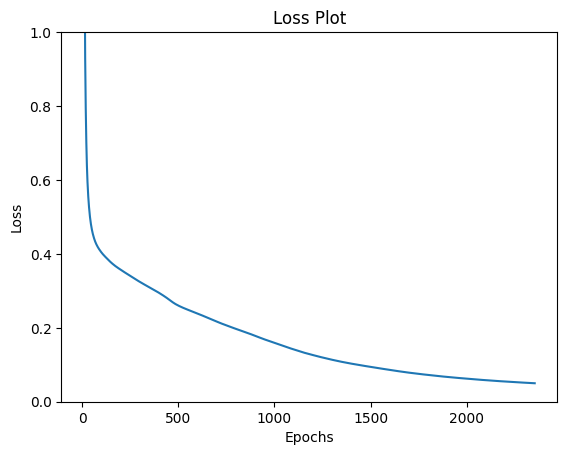

In [32]:
Xc.plotLoss()

In [33]:
xmin = min(X_train_circ[:,0])
xmax = max(X_train_circ[:,0])

ymin = min(X_train_circ[:,1])
ymax = max(X_train_circ[:,1])


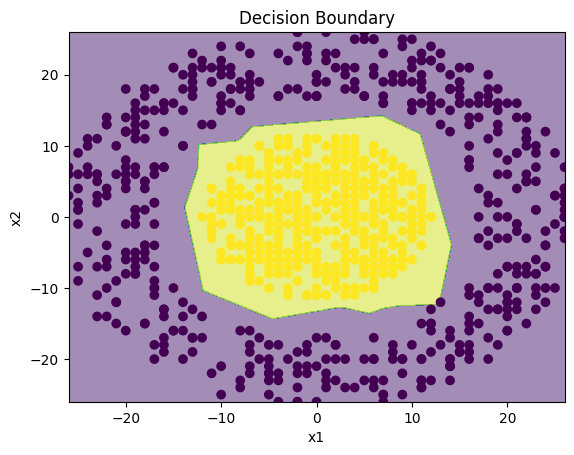

In [34]:
xvals, yvals = np.meshgrid(np.linspace(xmin,xmax, 1000), np.linspace(ymin,ymax, 1000))
preds = Xc.forward(np.array([xvals.flatten(), yvals.flatten()]).T)
preds_t = (preds>0.5)*1
preds_t = preds_t.reshape(xvals.shape)


plt.contourf(xvals, yvals, preds_t,alpha=0.5)
plt.title("Decision Boundary")
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_train_circ[:, 0], X_train_circ[:, 1], c=y_train_circ)
